# About Dataset
The travel dataset provides detailed information on various trips taken by travelers, including their destination, travel dates, duration of the trip in days, traveler demographics (name, age, gender, and nationality), as well as the type and cost of accommodation and transportation. This dataset can be used to gain insights into travel patterns, preferences, and behaviors of different types of travelers. It can also be helpful for travel-related businesses, such as travel agencies, to create tailored marketing strategies and travel packages that meet the needs and preferences of different travelers.

**Column details:**

* • Trip ID: A unique identifier for each trip taken by a traveler.
* • Destination: The name of the city or country visited by the traveler.
* • Start date: The date the traveler started the trip.
* • End date: The date the traveler ended the trip.
* • Duration (days): The number of days the traveler spent on the trip.
* • Traveler name: The name of the traveler.
* • Traveler age: The age of the traveler at the time of the trip.
* • Traveler gender: The gender of the traveler.
* • Traveler nationality: The nationality of the traveler.
* • Accommodation type: The type of accommodation the traveler stayed in, such as hotel, hostel, or Airbnb.
* • Accommodation cost: The cost of the accommodation for the entire trip.
* • Transportation type: The mode of transportation used by the traveler, such as plane, train, or car.
* • Transportation cost: The cost of transportation for the entire trip.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('/kaggle/input/traveler-trip-data/Travel details dataset.csv',index_col='Trip ID')
df.rename(columns={'Start date':'Start','End date':'End','Duration (days)':'Duration','Traveler name':'name','Traveler age':'age','Traveler gender':'gender','Traveler nationality':'nationality'},inplace=True)
df.head()

,Destination,Start,End,Duration,name,age,gender,nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
Trip ID,,,,,,,,,,,,
1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [3]:
df.shape

(139, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 1 to 139
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Destination          137 non-null    object 
 1   Start                137 non-null    object 
 2   End                  137 non-null    object 
 3   Duration             137 non-null    float64
 4   name                 137 non-null    object 
 5   age                  137 non-null    float64
 6   gender               137 non-null    object 
 7   nationality          137 non-null    object 
 8   Accommodation type   137 non-null    object 
 9   Accommodation cost   137 non-null    object 
 10  Transportation type  136 non-null    object 
 11  Transportation cost  136 non-null    object 
dtypes: float64(2), object(10)
memory usage: 14.1+ KB


In [5]:
df.dropna(inplace=True)

# Data Clean

In [6]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

df['Accommodation cost'] = df['Accommodation cost'].str.replace(',','').str.replace('$','').str.replace(' USD','').astype(int)
df['Transportation cost'] = df['Transportation cost'].str.replace(',','').str.replace('$','').str.replace(' USD','').astype(int)

df['Transportation type'] = df['Transportation type'].replace({'Flight':'Plane','Airplane':'Plane'})

In [7]:
city_country = {'Paris':'France','Bali':'Indonesia','Tokyo':'Japan','Sydney':'Australia','Rome':'Italy',
                'New York':'USA','Rio de Janeiro':'Brazil','Bangkok':'Thailand','Cancun':'Mexico','Barcelona':'Spain',
                'London':'UK','Vancouver':'Canada','Cape Town':'South Africa','Dubai':'United Arab Emirates',
                'Amsterdam':'Netherlands','Seoul':'South Korea','Los Angeles':'USA','Phuket':'Thailand','Auckland':'New Zealand',
                'Santorini':'Greece','Athens':'Greece','Phnom Penh':'Cambodia','Honolulu':'Hawaii','Berlin':'Germany',
                'Marrakech':'Morocco','Edinburgh':'Scotland'}

In [8]:
dest = pd.DataFrame(df.Destination.str.split(', ').values.tolist(),columns=['city','country']).head(30)
dest.loc[dest['country'].isna() & dest['city'].isin(city_country.values()),'country'] = dest.loc[dest['country'].isna() & dest['city'].isin(city_country.values()),'city']
dest.loc[dest['city'].isin(city_country.values()),'city'] = None
dest.loc[dest['country'].isna(),'country']= dest.loc[dest['country'].isna(),'city'].map(city_country)
dest.loc[dest['city'].isna(),'city']= dest.loc[dest['city'].isna(),'country'].map({v:k for k,v in city_country.items()})
dest

,city,country
0,London,UK
1,Phuket,Thailand
2,Bali,Indonesia
3,New York,USA
4,Tokyo,Japan
5,Paris,France
6,Sydney,Australia
7,Rio de Janeiro,Brazil
8,Amsterdam,Netherlands
9,Dubai,United Arab Emirates


# Which country is the most visited?

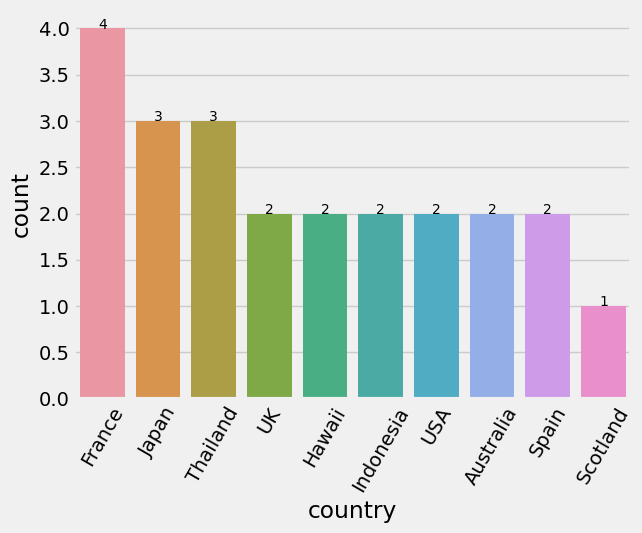

In [9]:
top10_country = dest.country.value_counts().reset_index().rename(columns={'index':'country','country':'count'}).head(10)
g = sns.barplot(data=top10_country,x='country',y='count')
for v in top10_country.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)
plt.show()

# Distribution of trip duration, customer age, Accommodation cost and Transportation cost

<AxesSubplot:xlabel='Transportation cost', ylabel='Density'>

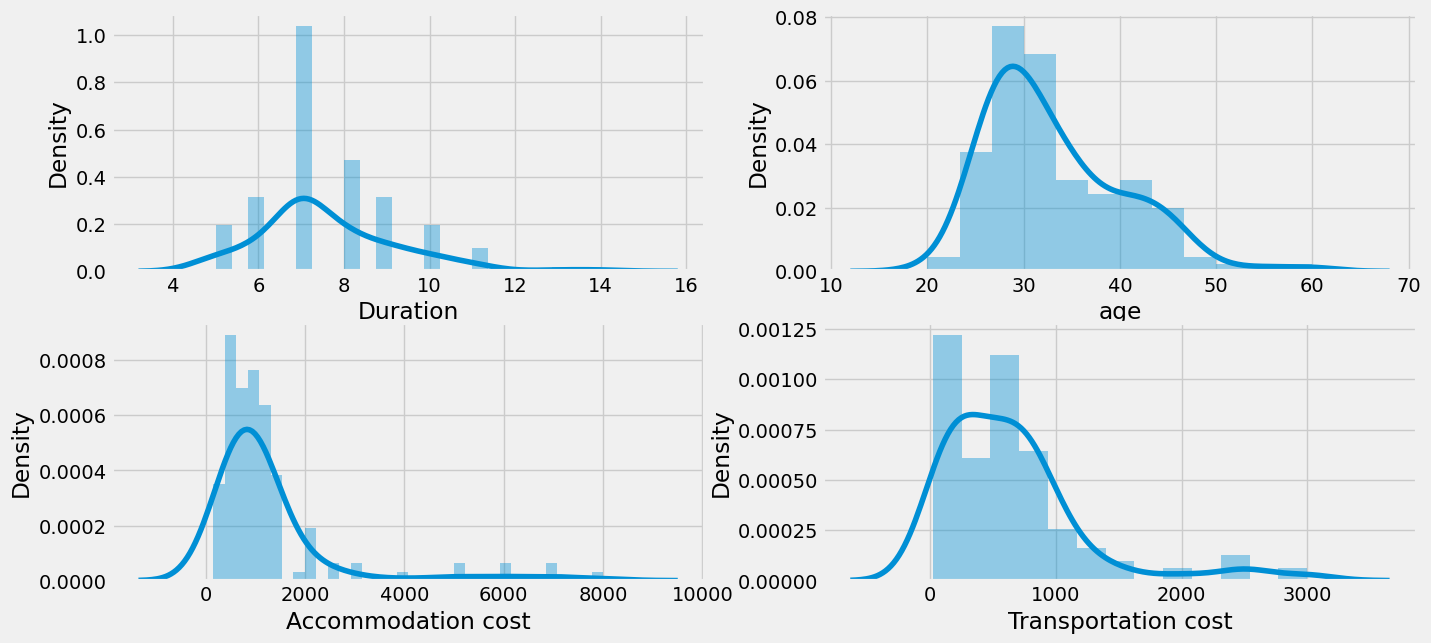

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.distplot(df['Duration'])
plt.subplot(2,2,2)
sns.distplot(df['age'])
plt.subplot(2,2,3)
sns.distplot(df['Accommodation cost'])
plt.subplot(2,2,4)
sns.distplot(df['Transportation cost'])

# Categorical Variables Analysis

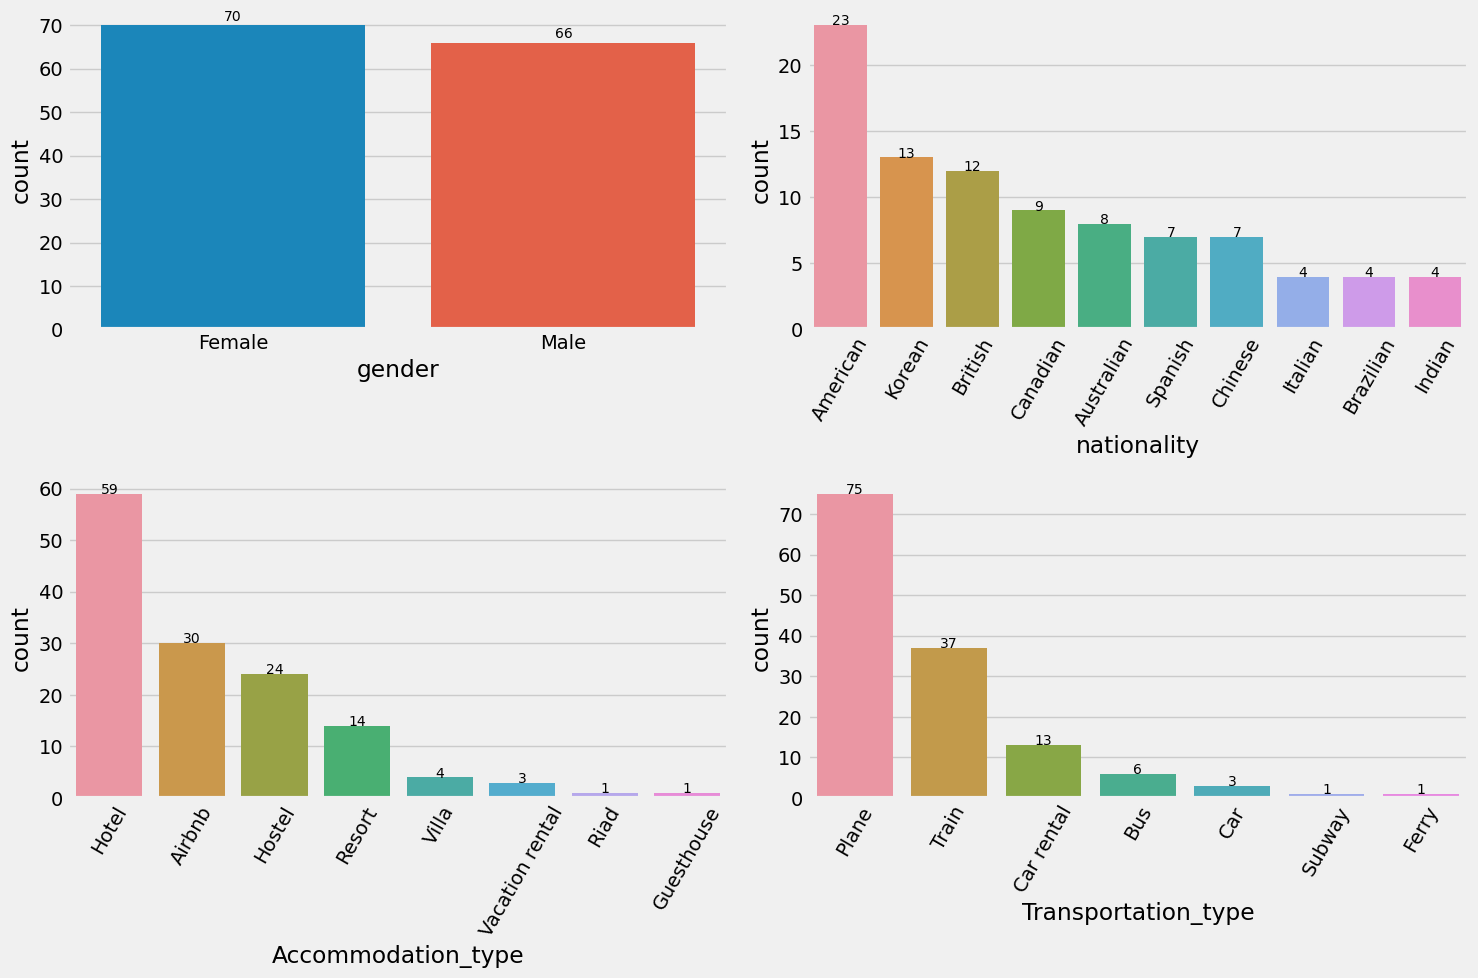

In [11]:
gender = df.gender.value_counts().reset_index().rename(columns={'index':'gender','gender':'count'})
nationality = df.nationality.value_counts().reset_index().rename(columns={'index':'nationality','nationality':'count'}).head(10)
acc_type = df['Accommodation type'].value_counts().reset_index().rename(columns={'index':'Accommodation_type','Accommodation type':'count'})
trans_type = df['Transportation type'].value_counts().reset_index().rename(columns={'index':'Transportation_type','Transportation type':'count'})

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
g = sns.barplot(data=gender,x='gender',y='count')
for v in gender.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count+1,s=str(v.count), size=10, ha="center")

plt.subplot(2,2,2)
g = sns.barplot(data=nationality,x='nationality',y='count')
for v in nationality.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)

plt.subplot(2,2,3)
g = sns.barplot(data=acc_type,x='Accommodation_type',y='count')
for v in acc_type.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)

plt.subplot(2,2,4)
g = sns.barplot(data=trans_type,x='Transportation_type',y='count')
for v in trans_type.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.count,s=str(v.count), size=10, ha="center")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

# Which gender spend the most on traval?

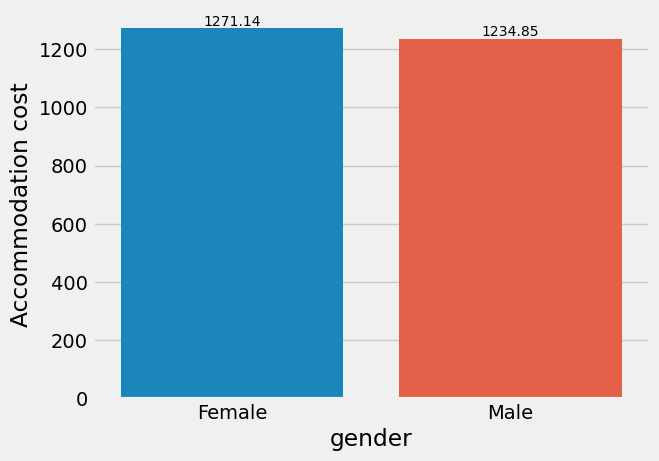

In [12]:
gender_acc_cost = round(df.groupby('gender')['Accommodation cost'].mean().reset_index(),2)
g = sns.barplot(data=gender_acc_cost,x='gender',y='Accommodation cost')
for v in gender_acc_cost.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+10,s=str(v._2), size=10, ha="center")
plt.show()

# Which nationality spend the most on traval?

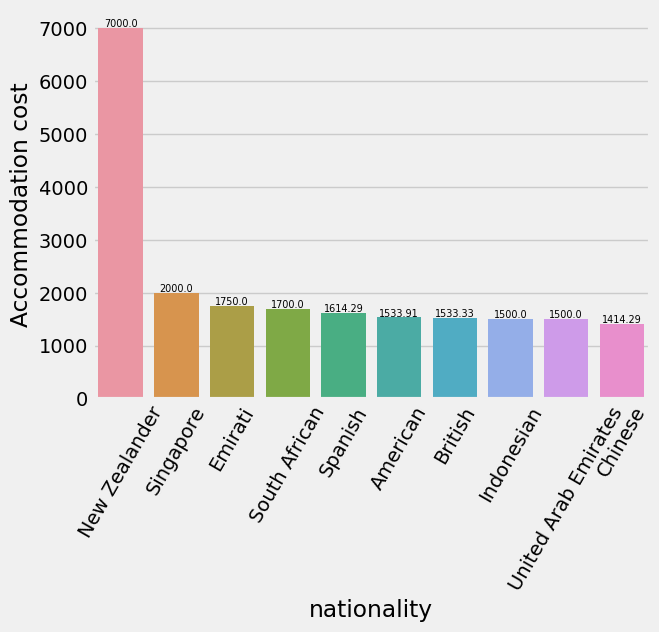

In [13]:
nationality_acc_cost = round(df.groupby('nationality')['Accommodation cost'].mean().reset_index().sort_values('Accommodation cost',ascending=False).head(10).reset_index(drop=True),2)
g = sns.barplot(data=nationality_acc_cost,x='nationality',y='Accommodation cost')
for v in nationality_acc_cost.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+20,s=str(v._2), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()

# Which nationality spend the most on transportation?

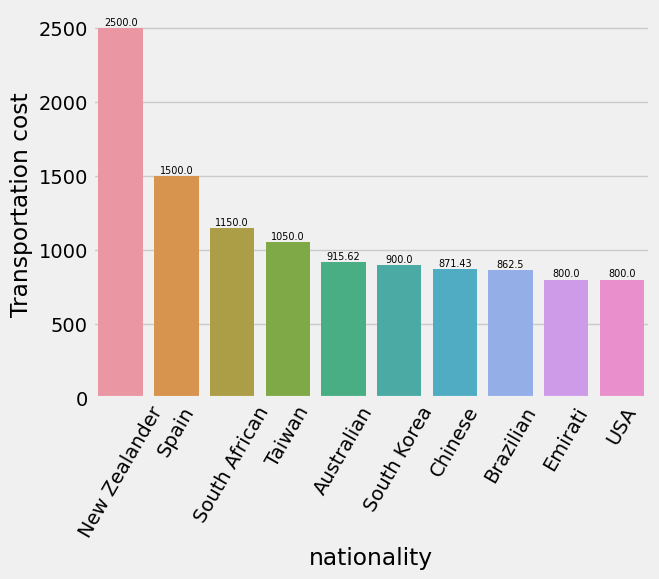

In [14]:
nationality_trans_cost = round(df.groupby('nationality')['Transportation cost'].mean().reset_index().sort_values('Transportation cost',ascending=False).head(10).reset_index(drop=True),2)
g = sns.barplot(data=nationality_trans_cost,x='nationality',y='Transportation cost')
for v in nationality_trans_cost.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+20,s=str(v._2), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()

# The average age of travelers by nationality

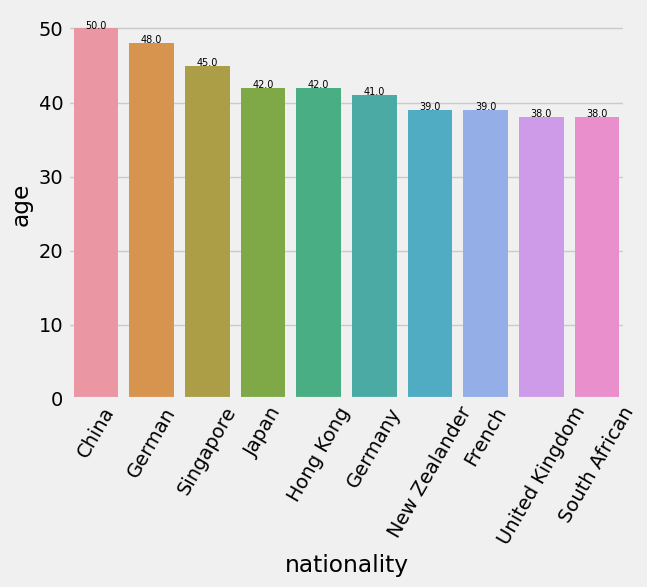

In [15]:
avg_age = df.groupby('nationality')['age'].mean().reset_index().sort_values('age',ascending=False).head(10).reset_index(drop=True)
g = sns.barplot(data=avg_age,x='nationality',y='age')
for v in avg_age.itertuples():
    #print(v)
    g.text(x=v.Index,y=v.age,s=str(v.age), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()

# Which Accommodation type cost the most?

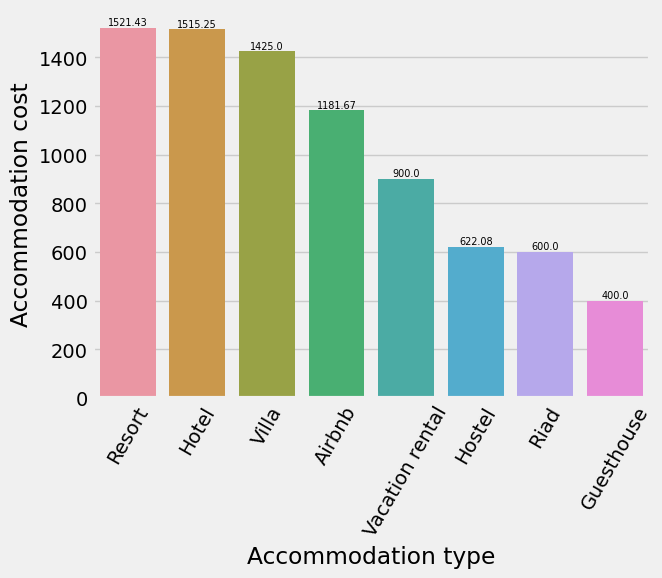

In [16]:
acc_type_cost = round(df.groupby('Accommodation type')['Accommodation cost'].mean().reset_index().sort_values('Accommodation cost',ascending=False).reset_index(drop=True),2)
g = sns.barplot(data=acc_type_cost,x='Accommodation type',y='Accommodation cost')
for v in acc_type_cost.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+10,s=str(v._2), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()

# Which type of transportation cost the most?

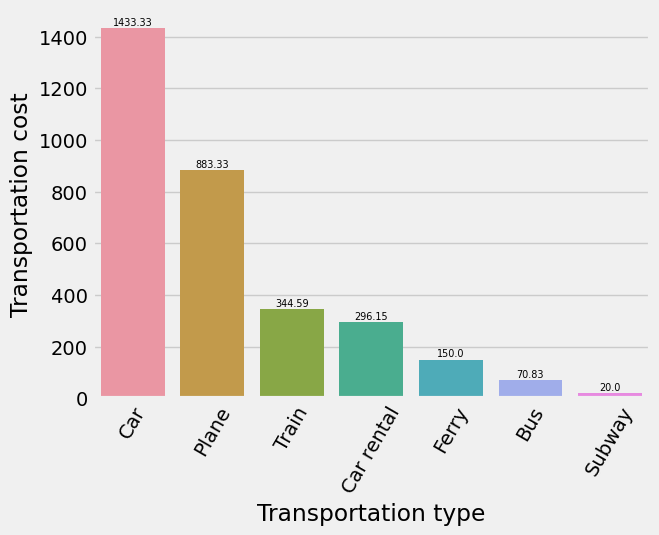

In [17]:
trans_type_cost = round(df.groupby('Transportation type')['Transportation cost'].mean().reset_index().sort_values('Transportation cost',ascending=False).reset_index(drop=True),2)
g = sns.barplot(data=trans_type_cost,x='Transportation type',y='Transportation cost')
for v in trans_type_cost.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+10,s=str(v._2), size=7, ha="center")
plt.xticks(rotation=60)
plt.show()